# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: Menti

Student name: Luca
    
ID: 2063594

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
#from sklearn_evaluation import plot


import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID =2063594# place a random seed
np.random.seed(ID)

In [4]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [54 63 64 72 62 58 63 53 57 54]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


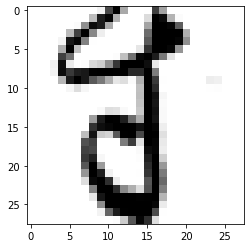

LABEL: 2
INPUT:


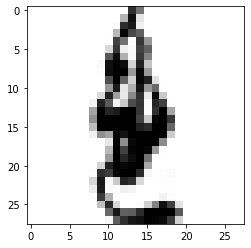

LABEL: 8
INPUT:


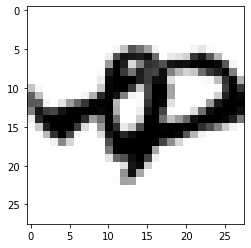

LABEL: 7
INPUT:


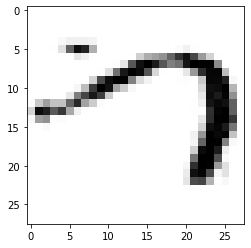

LABEL: 3


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:

from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {"kernel": ["linear"], 'C': [0.01, 0.1, 1, 10]}

#train linear SVM
grid = GridSearchCV(SVC(), parameters,cv=4) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 


print ('RESULTS FOR LINEAR KERNEL')
print("Best parameters set found:")
print(grid.best_params_) 
print("Score with best parameters:")
print(grid.best_score_)
print("All scores on the grid:")
print(grid.cv_results_['mean_test_score'])

RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 0.01, 'kernel': 'linear'}
Score with best parameters:
0.715
All scores on the grid:
[0.715      0.70166667 0.69833333 0.69833333]


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = { 'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1],"kernel": ["poly"],'degree':[2]}

#run SVM with poly of degree 2 kernel
#train
gridpo2 = GridSearchCV(SVC(), parameters,cv=4) 

# fitting the model for grid search 
gridpo2.fit(X_train, y_train) 


print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
print((gridpo2.best_params_) )
print("Score with best parameters:")
print(gridpo2.best_score_)
print("All scores on the grid:")
print(gridpo2.cv_results_['mean_test_score'])

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
Score with best parameters:
0.7466666666666667
All scores on the grid:
[0.12       0.73833333 0.74166667 0.44333333 0.74666667 0.74166667
 0.73833333 0.74166667 0.74166667]


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = { 'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1],"kernel": ["poly"],'degree':[3]}

#run SVM with poly of higher degree kernel
degree=3

#train
gridpo3 = GridSearchCV(SVC(), parameters,cv=4) 

# fitting the model for grid search 
gridpo3.fit(X_train, y_train) 

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:")
print((gridpo3.best_params_) )

print("Score with best parameters:")
print(gridpo3.best_score_)

print("All scores on the grid:")
print(gridpo3.cv_results_['mean_test_score'])

RESULTS FOR POLY DEGREE= 3  KERNEL
Best parameters set found:
{'C': 0.01, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Score with best parameters:
0.7233333333333333
All scores on the grid:
[0.12       0.72333333 0.68666667 0.395      0.68666667 0.68666667
 0.715      0.68666667 0.68666667]


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1],"kernel": ["rbf"]}

#run SVM with rbf kernel

#train
gridrbf = GridSearchCV(SVC(), parameters,cv=4) 

# fitting the model for grid search 
gridrbf.fit(X_train, y_train) 

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:")
print((gridrbf.best_params_) )

print("Score with best parameters:")
print(gridrbf.best_score_)

print("All scores on the grid:")
print(gridrbf.cv_results_['mean_test_score'])

RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Score with best parameters:
0.7883333333333333
All scores on the grid:
[0.12       0.24333333 0.12       0.12       0.62166667 0.77166667
 0.13666667 0.12       0.73833333 0.78833333 0.15666667 0.12
 0.72       0.78833333 0.15666667 0.12      ]


## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

There are few thing that is possible to observe:
- The lowest score with best parameters is obtained using the linear kernel;
- The highest score with best parameters is obtained using the RBF kernel;
- Linear and polynomial degree =3 kernels give us the same $C=0.01$ while the RBF and the polynomial degree =2 give us higher Cs, in particular $C_{RBF}=10 $ and $C_{poly,degree=2}=0.1$;
- Polynomial kernels give us the same $\gamma=0.1$ while RBF give us a smaller one $\gamma=0.01$;
- As the complexity of the kerneal increases the score get more unstable. In fact the score for linear model is almost constant when the parameters change while for polynomials and RBF oscillates a lots as the values of parameters change. 


## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
from sklearn.metrics import accuracy_score

#get training and test error for the best SVM model from CV
best_gamma=gridrbf.best_params_["gamma"]
best_c=gridrbf.best_params_["C"]
best_SVM = SVC(C=best_c,kernel="rbf", gamma=best_gamma)# USE YOUR OPTIMAL PARAMETERS
print("The best parameters are C=",best_c, "and gamma=", best_gamma )

#error on train
score_train=best_SVM.fit(X_train, y_train).score(X_train, y_train)
training_error=1-score_train

#error on test
y_prediction = best_SVM.predict(X_test)
test_score=accuracy_score(y_test,y_prediction)
test_error=1-test_score


# (error is 1 - svm.score)
print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

The best parameters are C= 10 and gamma= 0.01
Best SVM training error: 0.000000
Best SVM test error: 0.185500


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [13]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


The training scores for different values of gamma are: 
 [0.12, 0.12, 0.74, 0.9816666666666667, 1.0, 1.0, 1.0, 1.0]
The test scores for different values of gamma are: 
 [0.09825, 0.09825, 0.67375, 0.79525, 0.12175, 0.09825, 0.09825, 0.09825]


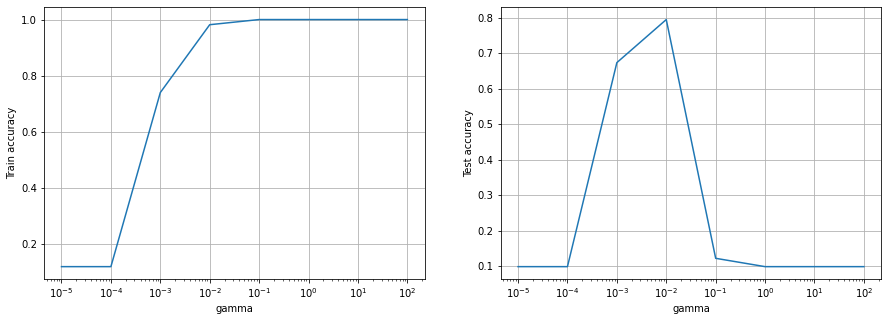

In [14]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

for i in range(len(gamma_values)):
    new_SVM = SVC(C=1,kernel="rbf", gamma=gamma_values[i])
    score_train=new_SVM.fit(X_train, y_train).score(X_train, y_train)
    y_prediction = new_SVM.predict(X_test)
    test_score=accuracy_score(y_test,y_prediction)
    train_acc_list.append(score_train)
    test_acc_list.append(test_score)


print("The training scores for different values of gamma are:", "\n", train_acc_list)
print("The test scores for different values of gamma are:", "\n", test_acc_list)


# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

As concerned the train error, if gamma increases (starting from $10^{-4}$) the error decreases and for $\gamma \ge 10^{-1} $  it is equal to 0.\
As concerned the test error, the accuracy increases in $\gamma \in [10^{-4},10^{-2}]$ where it reaches its maximum in $\gamma=10^{-2}$. Then it decreases and the error gets bigger.\
This is an example of overfitting, in fact as we increase $\gamma$ the train accurancy gets better and better but the test accurancy doesn't. At increasing gammas we are training our model focusing more and more on the train dataset, the result is an output model that behaves well only on the train dataset but it's not tailored for all the dataset, test set included.\
By the way, after this consideration, the best value of gamma is $\gamma=10^{-2}$.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [194 189 197 214 206 212 199 186 202 201]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [16]:
#get training and test error for the best SVM model from CV

#get training and test error for the best SVM model from CV
best_gamma=gridrbf.best_params_["gamma"]
best_c=gridrbf.best_params_["C"]
best_SVM = SVC(C=best_c,kernel="rbf", gamma=best_gamma)# USE YOUR OPTIMAL PARAMETERS
print("The best parameters are C=",best_c, "and gamma=", best_gamma )

#error on train
score_train=best_SVM.fit(X_train, y_train).score(X_train, y_train)
training_error=1-score_train

#error on test
y_prediction = best_SVM.predict(X_test)
test_score=accuracy_score(y_test,y_prediction)
test_error=1-test_score


print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

The best parameters are C= 10 and gamma= 0.01
Best SVM training error: 0.000000
Best SVM test error: 0.112914


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [17]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=10**9,max_iter=10000)

#error on train
score_train=LR.fit(X_train,y_train).score(X_train, y_train)
training_error=1-score_train

#error on test
y_prediction =LR.predict(X_test)
test_score=accuracy_score(y_test,y_prediction)
test_error=1-test_score

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.294690


## TO DO 9 Try  with regularization (use C=1)¶

In [18]:
LR = LogisticRegression(C=1,max_iter=1000)

#error on train
score_train=LR.fit(X_train,y_train).score(X_train, y_train)
training_error=1-score_train

#error on test
y_prediction =LR.predict(X_test)
test_score=accuracy_score(y_test,y_prediction)
test_error=1-test_score



print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.001000
Best regularized logistic regression test error: 0.256345


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

The main difference  between the results from SVM with m=600 and m=2000 is in the test error. The test error with a larger number of data points is less ($\sim$0.11) than the one with a few number of data ($\sim$0.19) as expected.  In fact using more data w expect a better model as we obtained. As concerned the training error, they are the same equal to 0.

If we compare the results of SVM with the ones of Logistic regression we can see that the training error of this last one is a bit higher than the SVM's one with C=1 and equal if C=$10^{9}$. Instead the test error obtained with Logistic Regression is more than two times greater ($\frac{0.26}{0.11}=2.4$) than the SVM one if we consider very large C =1 and almost three times greater ($\frac{0.29}{0.11}=2.6$)  if we consider the C=$10^{9}$.  We should specify that the algorithm takes  more time for executing over 2000 samples in the SVM regression than the logistic case for same number of samples. This proves  that SVM is a more complex algorithm, it tries not only to classify data but also to find the largest margin that split the classified samples. So it works better but take more time as it is more complex.

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

INPUT:


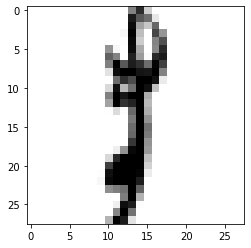

LABEL: 343


In [19]:
LR_prediction = LR.predict(X_test) 
SVM_prediction= best_SVM.predict(X_test)

y_item=[]
for i in range(len(X_test)):
    if LR_prediction[i] != y_test[i] and SVM_prediction[i]== y_test[i]:
        y_item.append(i)

plot_input(X_test,y_item,50)

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = confusion_matrix(y_test, best_SVM.predict(X_test))# ADD CODE
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR = confusion_matrix(y_test, LR.predict(X_test)) # ADD CODE
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5806 5811 5803 5786 5794 5788 5801 5814 5798 5799]

 Confusion matrix SVM  
 
 [[5356    6    4   24  129   66   14   65   82   60]
 [  17 5023   59   77  134   14  143    2  109  233]
 [   1  116 4783  134   61   58  357   26  206   61]
 [  13   59  154 5309   32   49   26   26  101   17]
 [ 143  128  107   44 5007   26  111   39  100   89]
 [  43   45  116  160   52 5198   49   23   75   27]
 [   8  149  332   37  148   34 4942   52   78   21]
 [  48   21   42   45  193   42   62 5250   62   49]
 [  23  108   77   48   28   36  133    5 5310   30]
 [  13  120  188   26   96   22   20   10   31 5273]]

 Confusion matrix SVM (normalized)   
 
 [[0.92 0.   0.   0.   0.02 0.01 0.   0.01 0.01 0.01]
 [0.   0.86 0.01 0.01 0.02 0.   0.02 0.   0.02 0.04]
 [0.   0.02 0.82 0.02 0.01 0.01 0.06 0.   0.04 0.01]
 [0.   0.01 0.03 0.92 0.01 0.01 0.   0.   0.02 0.  ]
 [0.02 0.02 0.02 0.01 0.86 0.   0.02 0.01 0.02 0.02]
 [0.01 0.01 0.02 0.03 0.01 0.9  0.01 0.   0.0

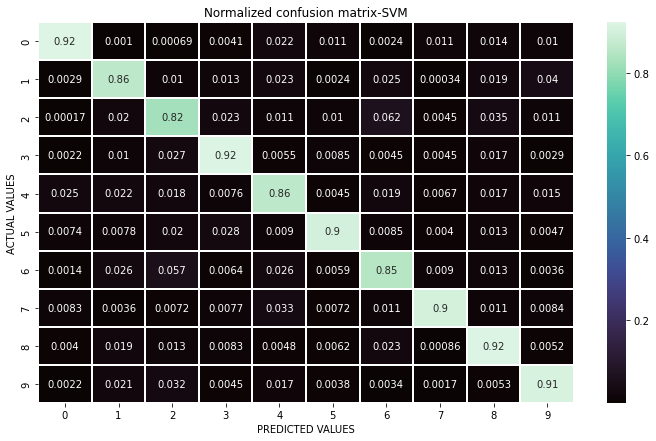

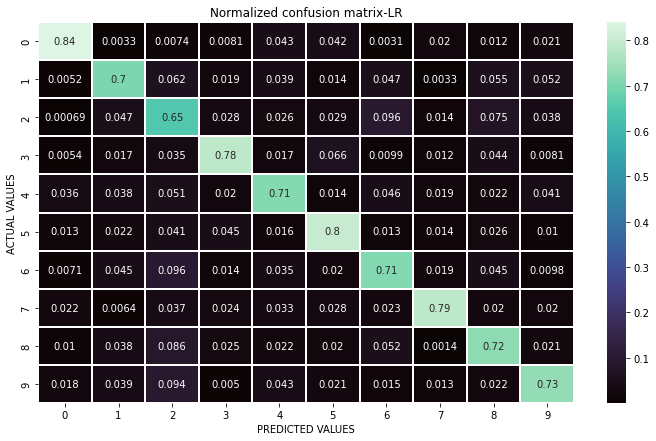

In [21]:
import seaborn as sns

#compute confusion normalize matrix
confusion_SVM_norm = confusion_matrix(y_test, best_SVM.predict(X_test),normalize='true')
confusion_LR_norm = confusion_matrix(y_test, LR.predict(X_test),normalize='true')


#plot them
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(confusion_SVM_norm , annot=True, linewidths = 0.01, ax = ax,cmap="mako")
ax.set_title('Normalized confusion matrix-SVM')
ax.set_xlabel('PREDICTED VALUES')
ax.set_ylabel('ACTUAL VALUES')

plt.show()



fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(confusion_LR_norm , annot=True, linewidths = 0.01, ax = ax,cmap="mako")
ax.set_title('Normalized confusion matrix-LR')
ax.set_xlabel('PREDICTED VALUES')
ax.set_ylabel('ACTUAL VALUES')

plt.show()

## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.

We can notice that the accuracies computed with SVM are higher than the LR one as expected from the previous cases. Furthermore it is possible to see that the class 2 has the lowest accuracy followed by class 6 in the SVM case. One possible explanation for this could be the fact that these two symbols are very similars so the algorithms could have found some difficulties in classification. The other symbols have got different shape  so it's easier the classification for the algorithms.